## 대중 교통 데이터

In [1]:
import pandas as pd
import numpy as np
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [3]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [4]:
# 한글 폰트 사용시 레이블의 '-' 기호 깨지는 현상 해결
plt.rc('axes', unicode_minus = False)  # plt.rcParams['axes.unicode_minus'] = False와 동일

In [5]:
data_file = '../DATA/subwayfee.csv'

### 대중교통 데이터 읽어오기 <hr>

In [6]:
f = open(data_file, encoding = 'utf-8-sig')

data = csv.reader(f)
header = next(data)
print(header)

i = 1
for row in data:
    print(row)
    if i > 5:
        break
    i += 1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['23.Dec', '1호선', '150', '서울역', '1442704', '1404121', '211843', '203808']
['23.Dec', '1호선', '151', '시청', '696784', '684254', '99882', '98107']
['23.Dec', '1호선', '152', '종각', '1010849', '985165', '162696', '152064']
['23.Dec', '1호선', '153', '종로3가', '488467', '450427', '310689', '286850']
['23.Dec', '1호선', '154', '종로5가', '483866', '476917', '246504', '239266']
['23.Dec', '1호선', '155', '동대문', '236114', '228110', '128542', '127639']


### 전체 탑승 인원 대비 유임 승차 비율이 가장 높은 역은? <hr>
- 유임 승차 대 무임 승차 비율 (rate) 계산 => rate = 유임 승차 인원/ 무임 승차 인원

In [7]:
f = open(data_file, encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data)
max_rate = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    rate = row[4] / row[6]  # row[6]의 값이 0인 역이 있다.
    if rate > max_rate:
        max_rate = rate

print(max_rate)
f.close()

ZeroDivisionError: division by zero

### 무임승차 인원이 0인 역 찾기 <hr>

In [8]:
f = open(data_file, encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data)
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])  # 4, 5, 6, 7 컬럼 값을 정수로 변환
    rate = row[4] / (row[4] + row[6])

    if row[6] == 0:  # 무임승차 인원[6]이 없는 역 출력
        print(row)

['23.Dec', '일산선', '1949', '지축', 8, 0, 0, 0]
['23.Dec', '경의선', '1295', '김포공항', 1, 0, 0, 0]
['23.Dec', '6호선', '2649', '신내', 10, 0, 0, 0]
['23.Dec', '7호선', '2755', '춘의', 1, 0, 0, 0]
['23.Dec', '7호선', '2756', '신중동', 1, 0, 0, 0]
['23.Dec', '7호선', '2760', '굴포천', 1, 0, 0, 0]


### 최대 무임 승차 비율 확인 <hr>

In [9]:
f = open(data_file, encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data)
max_rate = 0
for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    if row[6] != 0:
        # 무임 승차(%) = (무임 승차 수 x 100) / (유임 승차 수 + 무임 승차 수)
        rate = (row[6] * 100) / (row[4] + row[6])
        if rate > max_rate:
            max_rate = rate
            print(row, round(rate, 2), '%')
f.close()

['23.Dec', '1호선', '150', '서울역', 1442704, 1404121, 211843, 203808] 12.8 %
['23.Dec', '1호선', '152', '종각', 1010849, 985165, 162696, 152064] 13.86 %
['23.Dec', '1호선', '153', '종로3가', 488467, 450427, 310689, 286850] 38.88 %
['23.Dec', '1호선', '157', '제기동', 231358, 219338, 256218, 272510] 52.55 %
['23.Dec', '경원선', '1916', '소요산', 22856, 19642, 40555, 37554] 63.96 %
['23.Dec', '경원선', '1919', '연천', 10626, 10601, 20838, 21191] 66.23 %


### 최대 유임 승차 비율 찾기 <hr>

In [24]:
f = open(file, encoding = 'utf-8-sig')

data = csv.reader(f)
header = next(data)
max_rate = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])  # 4, 5, 6, 7 컬럼 값을 정수로 변환
    rate = (row[4]*100) / (row[4] + row[6])
    if rate > max_rate:
        max_rate = rate
    
    if row[6] == 0:
        print(row)

print(max_rate)
f.close()

['23.Dec', '일산선', '1949', '지축', 8, 0, 0, 0]
['23.Dec', '경의선', '1295', '김포공항', 1, 0, 0, 0]
['23.Dec', '6호선', '2649', '신내', 10, 0, 0, 0]
['23.Dec', '7호선', '2755', '춘의', 1, 0, 0, 0]
['23.Dec', '7호선', '2756', '신중동', 1, 0, 0, 0]
['23.Dec', '7호선', '2760', '굴포천', 1, 0, 0, 0]
100.0


In [17]:
f = open(data_file, encoding = 'utf-8-sig')

data = csv.reader(f)
header = next(data)
max_rate = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    if row[6] != 0:
        rate = (row[6] * 100) / (row[4] + row[6])
        if rate > max_rate:
            max_rate = rate
            print(row, round(rate, 2), '%')
    
f.close()

['23.Dec', '1호선', '150', '서울역', 1442704, 1404121, 211843, 203808] 12.8 %
['23.Dec', '1호선', '152', '종각', 1010849, 985165, 162696, 152064] 13.86 %
['23.Dec', '1호선', '153', '종로3가', 488467, 450427, 310689, 286850] 38.88 %
['23.Dec', '1호선', '157', '제기동', 231358, 219338, 256218, 272510] 52.55 %
['23.Dec', '경원선', '1916', '소요산', 22856, 19642, 40555, 37554] 63.96 %
['23.Dec', '경원선', '1919', '연천', 10626, 10601, 20838, 21191] 66.23 %


#### 최대 유임 승차 인원이 있는 역

In [27]:
f = open(file, encoding = 'utf-8-sig')
data = csv.reader(f)
next(data)

max_rate = 0
max_row = []
max_total_num = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    total_count = row[4] + row[6]
    if (row[6] != 0) and (total_count > 100000):
        rate = row[4] / total_count
        if rate > max_rate:
            max_rate = rate
            max_row = row
            max_total_num = total_count

print()
print(f'호선명 : {max_row[1]}, 역이름 : {max_row[3]}, 전체 인원 : {max_total_num}명, '
      f'유임승차인원 : {max_row[4]:,}명, 유임승차 비율 : {round(max_rate * 100, 2)}%')


호선명 : 공항철도 1호선, 역이름 : 홍대입구, 전체 인원 : 464662명, 유임승차인원 : 444,277명, 유임승차 비율 : 95.61%


#### 유임 승차 비율이 50% 이하인 역 

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['23.Dec', '1호선', '157', '제기동', 231358, '219338', 256218, '272510'] 0.47
['23.Dec', '1호선', '159', '동묘앞', 144443, '150931', 146515, '148571'] 0.5
['23.Dec', '경원선', '1916', '소요산', 22856, '19642', 40555, '37554'] 0.36
['23.Dec', '경원선', '1919', '연천', 10626, '10601', 20838, '21191'] 0.34
['23.Dec', '중앙선', '1218', '원덕', 4951, '4673', 5471, '5273'] 0.48

유임 승차 비율이 가장 낮은 역 : 연천
전체 인원 : 31,464명, 유임승차인원 : 10,626명, 유임승차비율 : 33.8%


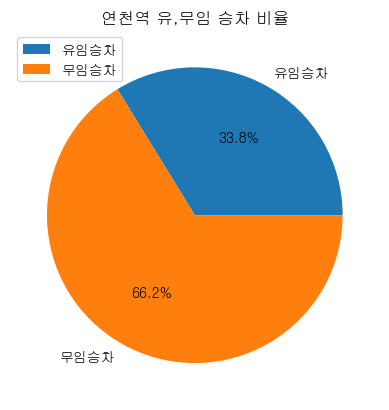

In [31]:
f = open(data_file, encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data)
print(header)

min_rate = 100
min_row = []
min_total_count = 0

for row in data:
    for i in [4, 6]:
        row[i] = int(row[i])
    total_count = row[4] + row[6]
    # 무임승차 인원이 없고, 총 승차인원이 1만명 이상
    if (row[6] != 0) and (total_count >= 10000):
        rate = row[4] / total_count
        if rate <= 0.5:
            print(row, round(rate, 2))
            if rate < min_rate:
                min_rate = rate
                min_row = row
                min_total_count = total_count
f.close()

print()
print(f'유임 승차 비율이 가장 낮은 역 : {min_row[3]}')
print(f'전체 인원 : {min_total_count:,}명, '
      f'유임승차인원 : {min_row[4]:,}명, '
      f'유임승차비율 : {round(min_rate*100, 1)}%')


plt.title(min_row[3] + '역 유,무임 승차 비율')
label = ['유임승차', '무임승차']
values = [min_row[4], min_row[6]]
plt.pie(values, labels = label, autopct = '%.1f%%')  # 데이터를 넣으면 비율은 함수가 알아서 계산
plt.legend(loc = 2)
plt.show()

#### 모든 역의 유임 승차, 유임 하차, 무임 승차,무임 하차 원인 분석

In [34]:
max = [0] * 4
max_station = [''] * 4
label = ['유임승차', '유임하차', '무임승차', '무임하차']

# with 구문 : 자동으로 파일을 close()시킴
with open(data_file, encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data)

    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i])
            if row[i] > max[i-4]:  # 원본데이터의 컬럼 (인덱스 - 4) -> max리스트의 인덱스 
                max[i-4] = row[i]
                max_station[i-4] = row[3] + ' ' + row[1]  # '역이름 지하철노선' 추가

for i in range(4):
    print(f'{label[i]} : {max_station[i]} {max[i]:,}명')


유임승차 : 잠실(송파구청) 2호선 2,407,622명
유임하차 : 잠실(송파구청) 2호선 2,389,008명
무임승차 : 종로3가 1호선 310,689명
무임하차 : 영등포 경부선 307,586명


In [35]:
label = ['유임승차', '유임하차', '무임승차', '무임하차']
color_list = ['#ff9999', '#ffc000',	'#8fd9b6', '#d395d0']
pic_count = 0
with open(file, encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data)

    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i])
        print(row)
        plt.figure(dpi = 100)  # 저장할 그림파일의 dpi 설정
        plt.title(row[3] + ' ' + row[1])
        plt.pie(row[4:8], labels = label, colors = color_list, autopct = '%.1f%%', shadow = True)
        plt.savefig('img/' + row[3] + ' ' + row[1] + '.png')
        plt.close()  # 파일 닫기

        pic_count += 1
        if pic_count >= 10:
            break


['23.Dec', '1호선', '150', '서울역', 1442704, 1404121, 211843, 203808]
['23.Dec', '1호선', '151', '시청', 696784, 684254, 99882, 98107]
['23.Dec', '1호선', '152', '종각', 1010849, 985165, 162696, 152064]
['23.Dec', '1호선', '153', '종로3가', 488467, 450427, 310689, 286850]
['23.Dec', '1호선', '154', '종로5가', 483866, 476917, 246504, 239266]
['23.Dec', '1호선', '155', '동대문', 236114, 228110, 128542, 127639]
['23.Dec', '1호선', '156', '신설동', 289402, 276992, 120282, 116775]
['23.Dec', '1호선', '157', '제기동', 231358, 219338, 256218, 272510]
['23.Dec', '1호선', '158', '청량리(서울시립대입구)', 380606, 372443, 274847, 276209]
['23.Dec', '1호선', '159', '동묘앞', 144443, 150931, 146515, 148571]
